In [1]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd



from joblib import Parallel, delayed
import shutil


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [2]:
# time.sleep(30)

In [3]:
def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)
    
#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [4]:
regions= ['ap-south-1', 'eu-central-1']


instance_type = 't2.small'

In [5]:
# EXP1

In [6]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 1, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 1, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 1, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 1, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 1, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 10, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 11, 'eu-central-1', 0, 2, 'FKE.pem', -1, 9,
# 12, 'eu-central-1', 0, 2, 'FKE.pem', -1, 10,
# 13, 'eu-central-1', 0, 2, 'FKE.pem', -1, 11,
# 14, 'eu-central-1', 0, 2, 'FKE.pem', -1, 12,
# 15, 'eu-central-1', 0, 2, 'FKE.pem', -1, 13,
# 16, 'eu-central-1', 1, -1, 'FKE.pem', 2, -1,




In [7]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;

# cluster_map[4] = 1;
# cluster_map[5] = 1;
# cluster_map[6] = 1;
# cluster_map[7] = 1;
# cluster_map[8] = 1;

# cluster_map[9] = 2;
# cluster_map[10] = 2;
# cluster_map[11] = 2;
# cluster_map[12] = 2;
# cluster_map[13] = 2;


In [8]:
#EXP 2

In [9]:
%%file node_info.csv
node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
8, 'ap-south-1', 0, 1, 'FKA.pem', -1, 8,
9, 'ap-south-1', 0, 1, 'FKA.pem', -1, 9,
10, 'ap-south-1', 0, 1, 'FKA.pem', -1, 10,
11, 'ap-south-1', 0, 1, 'FKA.pem', -1, 11,
12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
18, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
19, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
20, 'eu-central-1', 0, 2, 'FKE.pem', -1, 18,
21, 'eu-central-1', 0, 2, 'FKE.pem', -1, 19,
22, 'eu-central-1', 0, 2, 'FKE.pem', -1, 20,
23, 'eu-central-1', 0, 2, 'FKE.pem', -1, 21,
24, 'eu-central-1', 0, 2, 'FKE.pem', -1, 22,
25, 'eu-central-1', 0, 2, 'FKE.pem', -1, 23,
26, 'eu-central-1', 0, 2, 'FKE.pem', -1, 24,
27, 'eu-central-1', 0, 2, 'FKE.pem', -1, 25,
28, 'eu-central-1', 0, 2, 'FKE.pem', -1, 26,
29, 'eu-central-1', 0, 2, 'FKE.pem', -1, 27,
30, 'eu-central-1', 1, -1, 'FKE.pem', 2, -1,




Overwriting node_info.csv


In [10]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;

# cluster_map[8] = 1;
# cluster_map[9] = 1;
# cluster_map[10] = 1;
# cluster_map[11] = 1;
# cluster_map[12] = 1;
# cluster_map[13] = 1;
# cluster_map[14] = 1;
# cluster_map[15] = 1;
# cluster_map[16] = 1;
# cluster_map[17] = 1;

# cluster_map[18] = 2;
# cluster_map[19] = 2;
# cluster_map[20] = 2;
# cluster_map[21] = 2;
# cluster_map[22] = 2;
# cluster_map[23] = 2;
# cluster_map[24] = 2;
# cluster_map[25] = 2;
# cluster_map[26] = 2;
# cluster_map[27] = 2;


In [11]:
#EXP3

In [12]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 1, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 1, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 1, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 1, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 1, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 1, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 1, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 1, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 1, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 28, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 29, 'eu-central-1', 0, 2, 'FKE.pem', -1, 27,
# 30, 'eu-central-1', 0, 2, 'FKE.pem', -1, 28,
# 31, 'eu-central-1', 0, 2, 'FKE.pem', -1, 29,
# 32, 'eu-central-1', 0, 2, 'FKE.pem', -1, 30,
# 33, 'eu-central-1', 0, 2, 'FKE.pem', -1, 31,
# 34, 'eu-central-1', 0, 2, 'FKE.pem', -1, 32,
# 35, 'eu-central-1', 0, 2, 'FKE.pem', -1, 33,
# 36, 'eu-central-1', 0, 2, 'FKE.pem', -1, 34,
# 37, 'eu-central-1', 0, 2, 'FKE.pem', -1, 35,
# 38, 'eu-central-1', 0, 2, 'FKE.pem', -1, 36,
# 39, 'eu-central-1', 0, 2, 'FKE.pem', -1, 37,
# 40, 'eu-central-1', 0, 2, 'FKE.pem', -1, 38,
# 41, 'eu-central-1', 0, 2, 'FKE.pem', -1, 39,
# 42, 'eu-central-1', 0, 2, 'FKE.pem', -1, 40,
# 43, 'eu-central-1', 0, 2, 'FKE.pem', -1, 41,
# 44, 'eu-central-1', 1, -1, 'FKE.pem', 2, -1,




In [13]:
# cluster_map[0] = 0;  
# cluster_map[1] = 0;  
# cluster_map[2] = 0;  
# cluster_map[3] = 0;  
# cluster_map[4] = 0;  
# cluster_map[5] = 0;  
# cluster_map[6] = 0;  
# cluster_map[7] = 0;  
# cluster_map[8] = 0;  
# cluster_map[9] = 0;  
# cluster_map[10] = 0; 
# cluster_map[11] = 0; 
# cluster_map[12] = 1; 
# cluster_map[13] = 1; 
# cluster_map[14] = 1; 
# cluster_map[15] = 1; 
# cluster_map[16] = 1; 
# cluster_map[17] = 1; 
# cluster_map[18] = 1; 
# cluster_map[19] = 1; 
# cluster_map[20] = 1; 
# cluster_map[21] = 1; 
# cluster_map[22] = 1; 
# cluster_map[23] = 1; 
# cluster_map[24] = 1; 
# cluster_map[25] = 1; 
# cluster_map[26] = 1; 

# cluster_map[27] = 2;
# cluster_map[28] = 2;
# cluster_map[29] = 2;
# cluster_map[30] = 2;
# cluster_map[31] = 2;
# cluster_map[32] = 2;
# cluster_map[33] = 2;
# cluster_map[34] = 2;
# cluster_map[35] = 2;
# cluster_map[36] = 2;
# cluster_map[37] = 2;
# cluster_map[38] = 2;
# cluster_map[39] = 2;
# cluster_map[40] = 2;
# cluster_map[41] = 2;



In [14]:
#EXP 35

In [15]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,

# 16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 1, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 1, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 1, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 1, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 1, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 1, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 1, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 1, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 1, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 1, 'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 1, 'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 1, 'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 1, 'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 1, 'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 1, 'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 1, 'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 1, 'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 1, 'FKA.pem', -1, 35,

# 36, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 37, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 38, 'eu-central-1', 0, 2, 'FKE.pem', -1, 36,
# 39, 'eu-central-1', 0, 2, 'FKE.pem', -1, 37,
# 40, 'eu-central-1', 0, 2, 'FKE.pem', -1, 38,
# 41, 'eu-central-1', 0, 2, 'FKE.pem', -1, 39,
# 42, 'eu-central-1', 0, 2, 'FKE.pem', -1, 40,
# 43, 'eu-central-1', 0, 2, 'FKE.pem', -1, 41,
# 44, 'eu-central-1', 0, 2, 'FKE.pem', -1, 42,
# 45, 'eu-central-1', 0, 2, 'FKE.pem', -1, 43,
# 46, 'eu-central-1', 0, 2, 'FKE.pem', -1, 44,
# 47, 'eu-central-1', 0, 2, 'FKE.pem', -1, 45,
# 48, 'eu-central-1', 0, 2, 'FKE.pem', -1, 46,
# 49, 'eu-central-1', 0, 2, 'FKE.pem', -1, 47,
# 50, 'eu-central-1', 0, 2, 'FKE.pem', -1, 48,
# 51, 'eu-central-1', 0, 2, 'FKE.pem', -1, 49,
# 52, 'eu-central-1', 0, 2, 'FKE.pem', -1, 50,
# 53, 'eu-central-1', 0, 2, 'FKE.pem', -1, 51,
# 54, 'eu-central-1', 0, 2, 'FKE.pem', -1, 52,
# 55, 'eu-central-1', 0, 2, 'FKE.pem', -1, 53,
# 56, 'eu-central-1', 0, 2, 'FKE.pem', -1, 54,
# 57, 'eu-central-1', 0, 2, 'FKE.pem', -1, 55,

# 58, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [16]:

# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;

# cluster_map[16] = 1;
# cluster_map[17] = 1;
# cluster_map[18] = 1;
# cluster_map[19] = 1;
# cluster_map[20] = 1;
# cluster_map[21] = 1;
# cluster_map[22] = 1;
# cluster_map[23] = 1;
# cluster_map[24] = 1;
# cluster_map[25] = 1;
# cluster_map[26] = 1;
# cluster_map[27] = 1;
# cluster_map[28] = 1;
# cluster_map[29] = 1;
# cluster_map[30] = 1;
# cluster_map[31] = 1;
# cluster_map[32] = 1;
# cluster_map[33] = 1;
# cluster_map[34] = 1;
# cluster_map[35] = 1;


# cluster_map[36] = 2;
# cluster_map[37] = 2;
# cluster_map[38] = 2;
# cluster_map[39] = 2;
# cluster_map[40] = 2;
# cluster_map[41] = 2;
# cluster_map[42] = 2;
# cluster_map[43] = 2;
# cluster_map[44] = 2;
# cluster_map[45] = 2;
# cluster_map[46] = 2;
# cluster_map[47] = 2;
# cluster_map[48] = 2;
# cluster_map[49] = 2;
# cluster_map[50] = 2;
# cluster_map[51] = 2;
# cluster_map[52] = 2;
# cluster_map[53] = 2;
# cluster_map[54] = 2;
# cluster_map[55] = 2;





In [17]:
# EXP 38

In [18]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,

# 20, 'ap-south-1', 0, 1, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 1, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 1, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 1, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 1, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 1, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 1, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 1, 'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 1, 'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 1, 'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 1, 'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 1, 'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 1, 'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 1, 'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 1, 'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 1, 'FKA.pem', -1, 35,
# 36, 'ap-south-1', 0, 1, 'FKA.pem', -1, 36,
# 37, 'ap-south-1', 0, 1, 'FKA.pem', -1, 37,
# 38, 'ap-south-1', 0, 1, 'FKA.pem', -1, 38,
# 39, 'ap-south-1', 0, 1, 'FKA.pem', -1, 39,
# 40, 'ap-south-1', 0, 1, 'FKA.pem', -1, 40,
# 41, 'ap-south-1', 0, 1, 'FKA.pem', -1, 41,
# 42, 'ap-south-1', 0, 1, 'FKA.pem', -1, 42,
# 43, 'ap-south-1', 0, 1, 'FKA.pem', -1, 43,
# 44, 'ap-south-1', 0, 1, 'FKA.pem', -1, 44,

# 45, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 46, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,

# 47, 'eu-central-1', 0, 2, 'FKE.pem', -1, 45,
# 48, 'eu-central-1', 0, 2, 'FKE.pem', -1, 46,
# 49, 'eu-central-1', 0, 2, 'FKE.pem', -1, 47,
# 50, 'eu-central-1', 0, 2, 'FKE.pem', -1, 48,
# 51, 'eu-central-1', 0, 2, 'FKE.pem', -1, 49,
# 52, 'eu-central-1', 0, 2, 'FKE.pem', -1, 50,
# 53, 'eu-central-1', 0, 2, 'FKE.pem', -1, 51,
# 54, 'eu-central-1', 0, 2, 'FKE.pem', -1, 52,
# 55, 'eu-central-1', 0, 2, 'FKE.pem', -1, 53,
# 56, 'eu-central-1', 0, 2, 'FKE.pem', -1, 54,
# 57, 'eu-central-1', 0, 2, 'FKE.pem', -1, 55,
# 58, 'eu-central-1', 0, 2, 'FKE.pem', -1, 56,
# 59, 'eu-central-1', 0, 2, 'FKE.pem', -1, 57,
# 60, 'eu-central-1', 0, 2, 'FKE.pem', -1, 58,
# 61, 'eu-central-1', 0, 2, 'FKE.pem', -1, 59,
# 62, 'eu-central-1', 0, 2, 'FKE.pem', -1, 60,
# 63, 'eu-central-1', 0, 2, 'FKE.pem', -1, 61,
# 64, 'eu-central-1', 0, 2, 'FKE.pem', -1, 62,
# 65, 'eu-central-1', 0, 2, 'FKE.pem', -1, 63,
# 66, 'eu-central-1', 0, 2, 'FKE.pem', -1, 64,
# 67, 'eu-central-1', 0, 2, 'FKE.pem', -1, 65,
# 68, 'eu-central-1', 0, 2, 'FKE.pem', -1, 66,
# 69, 'eu-central-1', 0, 2, 'FKE.pem', -1, 67,
# 70, 'eu-central-1', 0, 2, 'FKE.pem', -1, 68,
# 71, 'eu-central-1', 0, 2, 'FKE.pem', -1, 69,

# 72, 'eu-central-1', 1, -1, 'FKE.pem', 2, -1,




In [19]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;
# cluster_map[16] = 0;
# cluster_map[17] = 0;
# cluster_map[18] = 0;
# cluster_map[19] = 0;

# cluster_map[20] = 1;
# cluster_map[21] = 1;
# cluster_map[22] = 1;
# cluster_map[23] = 1;
# cluster_map[24] = 1;
# cluster_map[25] = 1;
# cluster_map[26] = 1;
# cluster_map[27] = 1;
# cluster_map[28] = 1;
# cluster_map[29] = 1;
# cluster_map[30] = 1;
# cluster_map[31] = 1;
# cluster_map[32] = 1;
# cluster_map[33] = 1;
# cluster_map[34] = 1;
# cluster_map[35] = 1;
# cluster_map[36] = 1;
# cluster_map[37] = 1;
# cluster_map[38] = 1;
# cluster_map[39] = 1;
# cluster_map[40] = 1;
# cluster_map[41] = 1;
# cluster_map[42] = 1;
# cluster_map[43] = 1;
# cluster_map[44] = 1;


# cluster_map[45] = 2;
# cluster_map[46] = 2;
# cluster_map[47] = 2;
# cluster_map[48] = 2;
# cluster_map[49] = 2;
# cluster_map[50] = 2;
# cluster_map[51] = 2;
# cluster_map[52] = 2;
# cluster_map[53] = 2;
# cluster_map[54] = 2;
# cluster_map[55] = 2;
# cluster_map[56] = 2;
# cluster_map[57] = 2;
# cluster_map[58] = 2;
# cluster_map[59] = 2;
# cluster_map[60] = 2;
# cluster_map[61] = 2;
# cluster_map[62] = 2;
# cluster_map[63] = 2;
# cluster_map[64] = 2;
# cluster_map[65] = 2;
# cluster_map[66] = 2;
# cluster_map[67] = 2;
# cluster_map[68] = 2;
# cluster_map[69] = 2;




In [20]:
# #EXP 4

In [21]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,

# 9, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 10, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 11, 'eu-central-1', 0, 1, 'FKE.pem', -1, 9,
# 12, 'eu-central-1', 0, 1, 'FKE.pem', -1, 10,
# 13, 'eu-central-1', 0, 1, 'FKE.pem', -1, 11,
# 14, 'eu-central-1', 0, 1, 'FKE.pem', -1, 12,
# 15, 'eu-central-1', 0, 1, 'FKE.pem', -1, 13,

# 16, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [22]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;


# cluster_map[9] = 1;
# cluster_map[10] = 1;
# cluster_map[11] = 1;
# cluster_map[12] = 1;
# cluster_map[13] = 1;





In [23]:
#EXP 5

In [24]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,

# 18, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 19, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 20, 'eu-central-1', 0, 1, 'FKE.pem', -1, 18,
# 21, 'eu-central-1', 0, 1, 'FKE.pem', -1, 19,
# 22, 'eu-central-1', 0, 1, 'FKE.pem', -1, 20,
# 23, 'eu-central-1', 0, 1, 'FKE.pem', -1, 21,
# 24, 'eu-central-1', 0, 1, 'FKE.pem', -1, 22,
# 25, 'eu-central-1', 0, 1, 'FKE.pem', -1, 23,
# 26, 'eu-central-1', 0, 1, 'FKE.pem', -1, 24,
# 27, 'eu-central-1', 0, 1, 'FKE.pem', -1, 25,
# 28, 'eu-central-1', 0, 1, 'FKE.pem', -1, 26,
# 29, 'eu-central-1', 0, 1, 'FKE.pem', -1, 27,

# 30, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [25]:

# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;
# cluster_map[16] = 0;
# cluster_map[17] = 0;


# cluster_map[18] = 1;
# cluster_map[19] = 1;
# cluster_map[20] = 1;
# cluster_map[21] = 1;
# cluster_map[22] = 1;
# cluster_map[23] = 1;
# cluster_map[24] = 1;
# cluster_map[25] = 1;
# cluster_map[26] = 1;
# cluster_map[27] = 1;





In [26]:
#EXP 6

In [27]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 0, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 0, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 0, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 0, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 0, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 0, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 0, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 28, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 29, 'eu-central-1', 0, 1, 'FKE.pem', -1, 27,
# 30, 'eu-central-1', 0, 1, 'FKE.pem', -1, 28,
# 31, 'eu-central-1', 0, 1, 'FKE.pem', -1, 29,
# 32, 'eu-central-1', 0, 1, 'FKE.pem', -1, 30,
# 33, 'eu-central-1', 0, 1, 'FKE.pem', -1, 31,
# 34, 'eu-central-1', 0, 1, 'FKE.pem', -1, 32,
# 35, 'eu-central-1', 0, 1, 'FKE.pem', -1, 33,
# 36, 'eu-central-1', 0, 1, 'FKE.pem', -1, 34,
# 37, 'eu-central-1', 0, 1, 'FKE.pem', -1, 35,
# 38, 'eu-central-1', 0, 1, 'FKE.pem', -1, 36,
# 39, 'eu-central-1', 0, 1, 'FKE.pem', -1, 37,
# 40, 'eu-central-1', 0, 1, 'FKE.pem', -1, 38,
# 41, 'eu-central-1', 0, 1, 'FKE.pem', -1, 39,
# 42, 'eu-central-1', 0, 1, 'FKE.pem', -1, 40,
# 43, 'eu-central-1', 0, 1, 'FKE.pem', -1, 41,
# 44, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [28]:

# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;
# cluster_map[16] = 0;
# cluster_map[17] = 0;
# cluster_map[18] = 0;
# cluster_map[19] = 0;
# cluster_map[20] = 0;
# cluster_map[21] = 0;
# cluster_map[22] = 0;
# cluster_map[23] = 0;
# cluster_map[24] = 0;
# cluster_map[25] = 0;
# cluster_map[26] = 0;


# cluster_map[27] = 1;
# cluster_map[28] = 1;
# cluster_map[29] = 1;
# cluster_map[30] = 1;
# cluster_map[31] = 1;
# cluster_map[32] = 1;
# cluster_map[33] = 1;
# cluster_map[34] = 1;
# cluster_map[35] = 1;
# cluster_map[36] = 1;
# cluster_map[37] = 1;
# cluster_map[38] = 1;
# cluster_map[39] = 1;
# cluster_map[40] = 1;
# cluster_map[41] = 1;





In [29]:
#Exp 65

In [30]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,

# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 0, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 0, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 0, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 0, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 0, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 0, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 0, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 0, 'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 0, 'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 0, 'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 0, 'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 0, 'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 0, 'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 0, 'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 0, 'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 0, 'FKA.pem', -1, 35,

# 36, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 37, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 38, 'eu-central-1', 0, 1, 'FKE.pem', -1, 36,
# 39, 'eu-central-1', 0, 1, 'FKE.pem', -1, 37,
# 40, 'eu-central-1', 0, 1, 'FKE.pem', -1, 38,
# 41, 'eu-central-1', 0, 1, 'FKE.pem', -1, 39,
# 42, 'eu-central-1', 0, 1, 'FKE.pem', -1, 40,
# 43, 'eu-central-1', 0, 1, 'FKE.pem', -1, 41,
# 44, 'eu-central-1', 0, 1, 'FKE.pem', -1, 42,
# 45, 'eu-central-1', 0, 1, 'FKE.pem', -1, 43,
# 46, 'eu-central-1', 0, 1, 'FKE.pem', -1, 44,
# 47, 'eu-central-1', 0, 1, 'FKE.pem', -1, 45,
# 48, 'eu-central-1', 0, 1, 'FKE.pem', -1, 46,
# 49, 'eu-central-1', 0, 1, 'FKE.pem', -1, 47,
# 50, 'eu-central-1', 0, 1, 'FKE.pem', -1, 48,
# 51, 'eu-central-1', 0, 1, 'FKE.pem', -1, 49,
# 52, 'eu-central-1', 0, 1, 'FKE.pem', -1, 50,
# 53, 'eu-central-1', 0, 1, 'FKE.pem', -1, 51,
# 54, 'eu-central-1', 0, 1, 'FKE.pem', -1, 52,
# 55, 'eu-central-1', 0, 1, 'FKE.pem', -1, 53,
# 56, 'eu-central-1', 0, 1, 'FKE.pem', -1, 54,
# 57, 'eu-central-1', 0, 1, 'FKE.pem', -1, 55,

# 58, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [31]:

# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;

# cluster_map[16] = 0;
# cluster_map[17] = 0;
# cluster_map[18] = 0;
# cluster_map[19] = 0;
# cluster_map[20] = 0;
# cluster_map[21] = 0;
# cluster_map[22] = 0;
# cluster_map[23] = 0;
# cluster_map[24] = 0;
# cluster_map[25] = 0;
# cluster_map[26] = 0;
# cluster_map[27] = 0;
# cluster_map[28] = 0;
# cluster_map[29] = 0;
# cluster_map[30] = 0;
# cluster_map[31] = 0;
# cluster_map[32] = 0;
# cluster_map[33] = 0;
# cluster_map[34] = 0;
# cluster_map[35] = 0;


# cluster_map[36] = 1;
# cluster_map[37] = 1;
# cluster_map[38] = 1;
# cluster_map[39] = 1;
# cluster_map[40] = 1;
# cluster_map[41] = 1;
# cluster_map[42] = 1;
# cluster_map[43] = 1;
# cluster_map[44] = 1;
# cluster_map[45] = 1;
# cluster_map[46] = 1;
# cluster_map[47] = 1;
# cluster_map[48] = 1;
# cluster_map[49] = 1;
# cluster_map[50] = 1;
# cluster_map[51] = 1;
# cluster_map[52] = 1;
# cluster_map[53] = 1;
# cluster_map[54] = 1;
# cluster_map[55] = 1;





In [32]:
#EXP 68

In [33]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,

# 20, 'ap-south-1', 0, 0, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 0, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 0, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 0, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 0, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 0, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 0, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 0, 'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 0, 'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 0, 'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 0, 'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 0, 'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 0, 'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 0, 'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 0, 'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 0, 'FKA.pem', -1, 35,
# 36, 'ap-south-1', 0, 0, 'FKA.pem', -1, 36,
# 37, 'ap-south-1', 0, 0, 'FKA.pem', -1, 37,
# 38, 'ap-south-1', 0, 0, 'FKA.pem', -1, 38,
# 39, 'ap-south-1', 0, 0, 'FKA.pem', -1, 39,
# 40, 'ap-south-1', 0, 0, 'FKA.pem', -1, 40,
# 41, 'ap-south-1', 0, 0, 'FKA.pem', -1, 41,
# 42, 'ap-south-1', 0, 0, 'FKA.pem', -1, 42,
# 43, 'ap-south-1', 0, 0, 'FKA.pem', -1, 43,
# 44, 'ap-south-1', 0, 0, 'FKA.pem', -1, 44,

# 45, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 46, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 47, 'eu-central-1', 0, 1, 'FKE.pem', -1, 45,
# 48, 'eu-central-1', 0, 1, 'FKE.pem', -1, 46,
# 49, 'eu-central-1', 0, 1, 'FKE.pem', -1, 47,
# 50, 'eu-central-1', 0, 1, 'FKE.pem', -1, 48,
# 51, 'eu-central-1', 0, 1, 'FKE.pem', -1, 49,
# 52, 'eu-central-1', 0, 1, 'FKE.pem', -1, 50,
# 53, 'eu-central-1', 0, 1, 'FKE.pem', -1, 51,
# 54, 'eu-central-1', 0, 1, 'FKE.pem', -1, 52,
# 55, 'eu-central-1', 0, 1, 'FKE.pem', -1, 53,
# 56, 'eu-central-1', 0, 1, 'FKE.pem', -1, 54,
# 57, 'eu-central-1', 0, 1, 'FKE.pem', -1, 55,
# 58, 'eu-central-1', 0, 1, 'FKE.pem', -1, 56,
# 59, 'eu-central-1', 0, 1, 'FKE.pem', -1, 57,
# 60, 'eu-central-1', 0, 1, 'FKE.pem', -1, 58,
# 61, 'eu-central-1', 0, 1, 'FKE.pem', -1, 59,
# 62, 'eu-central-1', 0, 1, 'FKE.pem', -1, 60,
# 63, 'eu-central-1', 0, 1, 'FKE.pem', -1, 61,
# 64, 'eu-central-1', 0, 1, 'FKE.pem', -1, 62,
# 65, 'eu-central-1', 0, 1, 'FKE.pem', -1, 63,
# 66, 'eu-central-1', 0, 1, 'FKE.pem', -1, 64,
# 67, 'eu-central-1', 0, 1, 'FKE.pem', -1, 65,
# 68, 'eu-central-1', 0, 1, 'FKE.pem', -1, 66,
# 69, 'eu-central-1', 0, 1, 'FKE.pem', -1, 67,
# 70, 'eu-central-1', 0, 1, 'FKE.pem', -1, 68,
# 71, 'eu-central-1', 0, 1, 'FKE.pem', -1, 69,

# 72, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [34]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;
# cluster_map[16] = 0;
# cluster_map[17] = 0;
# cluster_map[18] = 0;
# cluster_map[19] = 0;
# cluster_map[20] = 0;
# cluster_map[21] = 0;
# cluster_map[22] = 0;
# cluster_map[23] = 0;
# cluster_map[24] = 0;
# cluster_map[25] = 0;
# cluster_map[26] = 0;
# cluster_map[27] = 0;
# cluster_map[28] = 0;
# cluster_map[29] = 0;
# cluster_map[30] = 0;
# cluster_map[31] = 0;
# cluster_map[32] = 0;
# cluster_map[33] = 0;
# cluster_map[34] = 0;
# cluster_map[35] = 0;
# cluster_map[36] = 0;
# cluster_map[37] = 0;
# cluster_map[38] = 0;
# cluster_map[39] = 0;
# cluster_map[40] = 0;
# cluster_map[41] = 0;
# cluster_map[42] = 0;
# cluster_map[43] = 0;
# cluster_map[44] = 0;



# cluster_map[45] = 1;
# cluster_map[46] = 1;
# cluster_map[47] = 1;
# cluster_map[48] = 1;
# cluster_map[49] = 1;
# cluster_map[50] = 1;
# cluster_map[51] = 1;
# cluster_map[52] = 1;
# cluster_map[53] = 1;
# cluster_map[54] = 1;
# cluster_map[55] = 1;
# cluster_map[56] = 1;
# cluster_map[57] = 1;
# cluster_map[58] = 1;
# cluster_map[59] = 1;
# cluster_map[60] = 1;
# cluster_map[61] = 1;
# cluster_map[62] = 1;
# cluster_map[63] = 1;
# cluster_map[64] = 1;
# cluster_map[65] = 1;
# cluster_map[66] = 1;
# cluster_map[67] = 1;
# cluster_map[68] = 1;
# cluster_map[69] = 1;





In [35]:
#EXP 7

In [36]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 1, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 1, 'FKA.pem', -1, 8,

# 9, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 10, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 11, 'eu-central-1', 0, 1, 'FKE.pem', -1, 9,
# 12, 'eu-central-1', 0, 1, 'FKE.pem', -1, 10,
# 13, 'eu-central-1', 0, 1, 'FKE.pem', -1, 11,
# 14, 'eu-central-1', 0, 1, 'FKE.pem', -1, 12,
# 15, 'eu-central-1', 0, 1, 'FKE.pem', -1, 13,

# 16, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [37]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;


# cluster_map[7] = 1;
# cluster_map[8] = 1;
# cluster_map[9] = 1;
# cluster_map[10] = 1;
# cluster_map[11] = 1;
# cluster_map[12] = 1;
# cluster_map[13] = 1;




In [38]:
#EXP 8

In [39]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,

# 18, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 19, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 20, 'eu-central-1', 0, 1, 'FKE.pem', -1, 18,
# 21, 'eu-central-1', 0, 1, 'FKE.pem', -1, 19,
# 22, 'eu-central-1', 0, 1, 'FKE.pem', -1, 20,
# 23, 'eu-central-1', 0, 1, 'FKE.pem', -1, 21,
# 24, 'eu-central-1', 0, 1, 'FKE.pem', -1, 22,
# 25, 'eu-central-1', 0, 1, 'FKE.pem', -1, 23,
# 26, 'eu-central-1', 0, 1, 'FKE.pem', -1, 24,
# 27, 'eu-central-1', 0, 1, 'FKE.pem', -1, 25,
# 28, 'eu-central-1', 0, 1, 'FKE.pem', -1, 26,
# 29, 'eu-central-1', 0, 1, 'FKE.pem', -1, 27,

# 30, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [40]:

# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;




# cluster_map[14] = 1;
# cluster_map[15] = 1;
# cluster_map[16] = 1;
# cluster_map[17] = 1;
# cluster_map[18] = 1;
# cluster_map[19] = 1;
# cluster_map[20] = 1;
# cluster_map[21] = 1;
# cluster_map[22] = 1;
# cluster_map[23] = 1;
# cluster_map[24] = 1;
# cluster_map[25] = 1;
# cluster_map[26] = 1;
# cluster_map[27] = 1;





In [41]:
#EXP 9

In [42]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 0, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 1, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 1, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 1, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 1, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 1, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 1, 'FKA.pem', -1, 26,

# 27, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 28, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 29, 'eu-central-1', 0, 1, 'FKE.pem', -1, 27,
# 30, 'eu-central-1', 0, 1, 'FKE.pem', -1, 28,
# 31, 'eu-central-1', 0, 1, 'FKE.pem', -1, 29,
# 32, 'eu-central-1', 0, 1, 'FKE.pem', -1, 30,
# 33, 'eu-central-1', 0, 1, 'FKE.pem', -1, 31,
# 34, 'eu-central-1', 0, 1, 'FKE.pem', -1, 32,
# 35, 'eu-central-1', 0, 1, 'FKE.pem', -1, 33,
# 36, 'eu-central-1', 0, 1, 'FKE.pem', -1, 34,
# 37, 'eu-central-1', 0, 1, 'FKE.pem', -1, 35,
# 38, 'eu-central-1', 0, 1, 'FKE.pem', -1, 36,
# 39, 'eu-central-1', 0, 1, 'FKE.pem', -1, 37,
# 40, 'eu-central-1', 0, 1, 'FKE.pem', -1, 38,
# 41, 'eu-central-1', 0, 1, 'FKE.pem', -1, 39,
# 42, 'eu-central-1', 0, 1, 'FKE.pem', -1, 40,
# 43, 'eu-central-1', 0, 1, 'FKE.pem', -1, 41,

# 44, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [43]:

# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;
# cluster_map[16] = 0;
# cluster_map[17] = 0;
# cluster_map[18] = 0;
# cluster_map[19] = 0;
# cluster_map[20] = 0;




# cluster_map[21] = 1;
# cluster_map[22] = 1;
# cluster_map[23] = 1;
# cluster_map[24] = 1;
# cluster_map[25] = 1;
# cluster_map[26] = 1;
# cluster_map[27] = 1;
# cluster_map[28] = 1;
# cluster_map[29] = 1;
# cluster_map[30] = 1;
# cluster_map[31] = 1;
# cluster_map[32] = 1;
# cluster_map[33] = 1;
# cluster_map[34] = 1;
# cluster_map[35] = 1;
# cluster_map[36] = 1;
# cluster_map[37] = 1;
# cluster_map[38] = 1;
# cluster_map[39] = 1;
# cluster_map[40] = 1;
# cluster_map[41] = 1;





In [44]:
#EXP 95

In [45]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,

# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 0, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 0, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 0, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 0, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 0, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 0, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 0, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 0, 'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 1, 'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 1, 'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 1, 'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 1, 'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 1, 'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 1, 'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 1, 'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 1, 'FKA.pem', -1, 35,

# 36, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 37, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 38, 'eu-central-1', 0, 1, 'FKE.pem', -1, 36,
# 39, 'eu-central-1', 0, 1, 'FKE.pem', -1, 37,
# 40, 'eu-central-1', 0, 1, 'FKE.pem', -1, 38,
# 41, 'eu-central-1', 0, 1, 'FKE.pem', -1, 39,
# 42, 'eu-central-1', 0, 1, 'FKE.pem', -1, 40,
# 43, 'eu-central-1', 0, 1, 'FKE.pem', -1, 41,
# 44, 'eu-central-1', 0, 1, 'FKE.pem', -1, 42,
# 45, 'eu-central-1', 0, 1, 'FKE.pem', -1, 43,
# 46, 'eu-central-1', 0, 1, 'FKE.pem', -1, 44,
# 47, 'eu-central-1', 0, 1, 'FKE.pem', -1, 45,
# 48, 'eu-central-1', 0, 1, 'FKE.pem', -1, 46,
# 49, 'eu-central-1', 0, 1, 'FKE.pem', -1, 47,
# 50, 'eu-central-1', 0, 1, 'FKE.pem', -1, 48,
# 51, 'eu-central-1', 0, 1, 'FKE.pem', -1, 49,
# 52, 'eu-central-1', 0, 1, 'FKE.pem', -1, 50,
# 53, 'eu-central-1', 0, 1, 'FKE.pem', -1, 51,
# 54, 'eu-central-1', 0, 1, 'FKE.pem', -1, 52,
# 55, 'eu-central-1', 0, 1, 'FKE.pem', -1, 53,
# 56, 'eu-central-1', 0, 1, 'FKE.pem', -1, 54,
# 57, 'eu-central-1', 0, 1, 'FKE.pem', -1, 55,

# 58, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [46]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;
# cluster_map[16] = 0;
# cluster_map[17] = 0;
# cluster_map[18] = 0;
# cluster_map[19] = 0;
# cluster_map[20] = 0;
# cluster_map[21] = 0;
# cluster_map[22] = 0;
# cluster_map[23] = 0;
# cluster_map[24] = 0;
# cluster_map[25] = 0;
# cluster_map[26] = 0;
# cluster_map[27] = 0;




# cluster_map[28] = 1;
# cluster_map[29] = 1;
# cluster_map[30] = 1;
# cluster_map[31] = 1;
# cluster_map[32] = 1;
# cluster_map[33] = 1;
# cluster_map[34] = 1;
# cluster_map[35] = 1;
# cluster_map[36] = 1;
# cluster_map[37] = 1;
# cluster_map[38] = 1;
# cluster_map[39] = 1;
# cluster_map[40] = 1;
# cluster_map[41] = 1;
# cluster_map[42] = 1;
# cluster_map[43] = 1;
# cluster_map[44] = 1;
# cluster_map[45] = 1;
# cluster_map[46] = 1;
# cluster_map[47] = 1;
# cluster_map[48] = 1;
# cluster_map[49] = 1;
# cluster_map[50] = 1;
# cluster_map[51] = 1;
# cluster_map[52] = 1;
# cluster_map[53] = 1;
# cluster_map[54] = 1;
# cluster_map[55] = 1;




In [47]:
#EXP 98

In [48]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,

# 20, 'ap-south-1', 0, 0, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 0, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 0, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 0, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 0, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 0, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 0, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 0, 0, 'FKA.pem', -1, 27,
# 28, 'ap-south-1', 0, 0, 'FKA.pem', -1, 28,
# 29, 'ap-south-1', 0, 0, 'FKA.pem', -1, 29,
# 30, 'ap-south-1', 0, 0, 'FKA.pem', -1, 30,
# 31, 'ap-south-1', 0, 0, 'FKA.pem', -1, 31,
# 32, 'ap-south-1', 0, 0, 'FKA.pem', -1, 32,
# 33, 'ap-south-1', 0, 0, 'FKA.pem', -1, 33,
# 34, 'ap-south-1', 0, 0, 'FKA.pem', -1, 34,
# 35, 'ap-south-1', 0, 1, 'FKA.pem', -1, 35,
# 36, 'ap-south-1', 0, 1, 'FKA.pem', -1, 36,
# 37, 'ap-south-1', 0, 1, 'FKA.pem', -1, 37,
# 38, 'ap-south-1', 0, 1, 'FKA.pem', -1, 38,
# 39, 'ap-south-1', 0, 1, 'FKA.pem', -1, 39,
# 40, 'ap-south-1', 0, 1, 'FKA.pem', -1, 40,
# 41, 'ap-south-1', 0, 1, 'FKA.pem', -1, 41,
# 42, 'ap-south-1', 0, 1, 'FKA.pem', -1, 42,
# 43, 'ap-south-1', 0, 1, 'FKA.pem', -1, 43,
# 44, 'ap-south-1', 0, 1, 'FKA.pem', -1, 44,

# 45, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 46, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,

# 47, 'eu-central-1', 0, 1, 'FKE.pem', -1, 45,
# 48, 'eu-central-1', 0, 1, 'FKE.pem', -1, 46,
# 49, 'eu-central-1', 0, 1, 'FKE.pem', -1, 47,
# 50, 'eu-central-1', 0, 1, 'FKE.pem', -1, 48,
# 51, 'eu-central-1', 0, 1, 'FKE.pem', -1, 49,
# 52, 'eu-central-1', 0, 1, 'FKE.pem', -1, 50,
# 53, 'eu-central-1', 0, 1, 'FKE.pem', -1, 51,
# 54, 'eu-central-1', 0, 1, 'FKE.pem', -1, 52,
# 55, 'eu-central-1', 0, 1, 'FKE.pem', -1, 53,
# 56, 'eu-central-1', 0, 1, 'FKE.pem', -1, 54,
# 57, 'eu-central-1', 0, 1, 'FKE.pem', -1, 55,
# 58, 'eu-central-1', 0, 1, 'FKE.pem', -1, 56,
# 59, 'eu-central-1', 0, 1, 'FKE.pem', -1, 57,
# 60, 'eu-central-1', 0, 1, 'FKE.pem', -1, 58,
# 61, 'eu-central-1', 0, 1, 'FKE.pem', -1, 59,
# 62, 'eu-central-1', 0, 1, 'FKE.pem', -1, 60,
# 63, 'eu-central-1', 0, 1, 'FKE.pem', -1, 61,
# 64, 'eu-central-1', 0, 1, 'FKE.pem', -1, 62,
# 65, 'eu-central-1', 0, 1, 'FKE.pem', -1, 63,
# 66, 'eu-central-1', 0, 1, 'FKE.pem', -1, 64,
# 67, 'eu-central-1', 0, 1, 'FKE.pem', -1, 65,
# 68, 'eu-central-1', 0, 1, 'FKE.pem', -1, 66,
# 69, 'eu-central-1', 0, 1, 'FKE.pem', -1, 67,
# 70, 'eu-central-1', 0, 1, 'FKE.pem', -1, 68,
# 71, 'eu-central-1', 0, 1, 'FKE.pem', -1, 69,

# 72, 'eu-central-1', 1, -1, 'FKE.pem', 1, -1,




In [49]:
# cluster_map[0] = 0;
# cluster_map[1] = 0;
# cluster_map[2] = 0;
# cluster_map[3] = 0;
# cluster_map[4] = 0;
# cluster_map[5] = 0;
# cluster_map[6] = 0;
# cluster_map[7] = 0;
# cluster_map[8] = 0;
# cluster_map[9] = 0;
# cluster_map[10] = 0;
# cluster_map[11] = 0;
# cluster_map[12] = 0;
# cluster_map[13] = 0;
# cluster_map[14] = 0;
# cluster_map[15] = 0;
# cluster_map[16] = 0;
# cluster_map[17] = 0;
# cluster_map[18] = 0;
# cluster_map[19] = 0;
# cluster_map[20] = 0;
# cluster_map[21] = 0;
# cluster_map[22] = 0;
# cluster_map[23] = 0;
# cluster_map[24] = 0;
# cluster_map[25] = 0;
# cluster_map[26] = 0;
# cluster_map[27] = 0;
# cluster_map[28] = 0;
# cluster_map[29] = 0;
# cluster_map[30] = 0;
# cluster_map[31] = 0;
# cluster_map[32] = 0;
# cluster_map[33] = 0;
# cluster_map[34] = 0;



# cluster_map[35] = 1;
# cluster_map[36] = 1;
# cluster_map[37] = 1;
# cluster_map[38] = 1;
# cluster_map[39] = 1;
# cluster_map[40] = 1;
# cluster_map[41] = 1;
# cluster_map[42] = 1;
# cluster_map[43] = 1;
# cluster_map[44] = 1;
# cluster_map[45] = 1;
# cluster_map[46] = 1;
# cluster_map[47] = 1;
# cluster_map[48] = 1;
# cluster_map[49] = 1;
# cluster_map[50] = 1;
# cluster_map[51] = 1;
# cluster_map[52] = 1;
# cluster_map[53] = 1;
# cluster_map[54] = 1;
# cluster_map[55] = 1;
# cluster_map[56] = 1;
# cluster_map[57] = 1;
# cluster_map[58] = 1;
# cluster_map[59] = 1;
# cluster_map[60] = 1;
# cluster_map[61] = 1;
# cluster_map[62] = 1;
# cluster_map[63] = 1;
# cluster_map[64] = 1;
# cluster_map[65] = 1;
# cluster_map[66] = 1;
# cluster_map[67] = 1;
# cluster_map[68] = 1;
# cluster_map[69] = 1;





In [50]:

#     cluster_map[0] = 0;
#     cluster_map[1] = 0;
#     cluster_map[2] = 0;
#     cluster_map[3] = 0;

#     cluster_map[4] = 0;
#     cluster_map[5] = 0;
#     cluster_map[6] = 0;
#     cluster_map[7] = 0;

#     cluster_map[8] = 0;
#     cluster_map[9] = 0;
#     cluster_map[10] = 1;
#     cluster_map[11] = 1;

#     cluster_map[12] = 1;
#     cluster_map[13] = 1;
#     cluster_map[14] = 1;
#     cluster_map[15] = 1;

#     cluster_map[16] = 1;
#     cluster_map[17] = 1;
#     cluster_map[18] = 1;
#     cluster_map[19] = 1;

# //    cluster_map[20] = 3;
# //    cluster_map[21] = 3;
# //    cluster_map[22] = 3;
# //    cluster_map[23] = 3;
# //
# //
# //    cluster_map[24] = 4;
# //    cluster_map[25] = 4;
# //    cluster_map[26] = 4;
# //    cluster_map[27] = 4;
# //    cluster_map[28] = 4;
# //    cluster_map[29] = 4;
# //    cluster_map[30] = 5;
# //    cluster_map[31] = 5;
# //
# //
# //    cluster_map[32] = 5;
# //    cluster_map[33] = 5;
# //    cluster_map[34] = 5;
# //    cluster_map[35] = 5;
# //    cluster_map[36] = 6;
# //    cluster_map[37] = 6;
# //    cluster_map[38] = 6;
# //    cluster_map[39] = 6;
# //
# //    cluster_map[40] = 6;
# //    cluster_map[41] = 6;
# //    cluster_map[42] = 7;
# //    cluster_map[43] = 7;
# //
# //    cluster_map[44] = 7;
# //    cluster_map[45] = 7;
# //    cluster_map[46] = 7;
# //    cluster_map[47] = 7;


In [51]:
df =pd.read_csv('node_info.csv')

In [52]:
node_info_dict = df.to_dict()

In [53]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'eu-central-1'",
  21: " 'eu-central-1'",
  22: " 'eu-central-1'",
  23: " 'eu-central-1'",
  24: " 'eu-central-1'",
  25: " 'eu-central-1'",
  26: " 'eu-central-1'",
  27: " 'eu-central-1'",
  28: " 'eu-central-1'",
  29: " 'eu-c

In [54]:

instance_type2 = 'c4.4xlarge'
redirect2 = '>>'

for index, region  in enumerate(regions):
    
    print(index, region)
    redirect = '>>'
    if index==0:
        redirect = '>'
        
    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")


    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    

#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_internal_ips")



#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_external_ips")
    
    
    
    
    

0 ap-south-1
aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_internal_ips
aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips
1 eu-central-1
aws --region eu-central-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text >> all_internal_ips
aws --region eu-central-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text >> all_external_ips


In [55]:
!cat all_internal_ips
! echo " " 
# !cat all_external_ips

13.232.173.118
3.110.172.134
3.110.212.95
13.232.79.7
65.2.168.24
52.66.200.4
13.127.100.122
13.234.38.34
65.0.95.176
65.2.140.5
43.204.36.48
13.232.194.138
13.233.195.97
13.234.114.50
13.127.44.198
13.235.246.255
65.2.182.200
13.233.3.216
13.233.167.11
13.127.85.127
3.68.117.26
3.71.28.25
3.74.230.44
18.156.198.70
18.184.175.1
18.192.6.110
18.197.179.155
3.70.200.104
3.69.54.217
18.156.191.13
3.68.106.77
 


In [56]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [57]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [58]:
data2, len(data2)

(['13.232.173.118',
  '3.110.172.134',
  '3.110.212.95',
  '13.232.79.7',
  '65.2.168.24',
  '52.66.200.4',
  '13.127.100.122',
  '13.234.38.34',
  '65.0.95.176',
  '65.2.140.5',
  '43.204.36.48',
  '13.232.194.138',
  '13.233.195.97',
  '13.234.114.50',
  '13.127.44.198',
  '13.235.246.255',
  '65.2.182.200',
  '13.233.3.216',
  '13.233.167.11',
  '13.127.85.127',
  '3.68.117.26',
  '3.71.28.25',
  '3.74.230.44',
  '18.156.198.70',
  '18.184.175.1',
  '18.192.6.110',
  '18.197.179.155',
  '3.70.200.104',
  '3.69.54.217',
  '18.156.191.13',
  '3.68.106.77'],
 31)

In [59]:
data = []

In [60]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [61]:
data, len(data)

(['13.232.173.118    13.232.173.118',
  '3.110.172.134    3.110.172.134',
  '3.110.212.95    3.110.212.95',
  '13.232.79.7    13.232.79.7',
  '65.2.168.24    65.2.168.24',
  '52.66.200.4    52.66.200.4',
  '13.127.100.122    13.127.100.122',
  '13.234.38.34    13.234.38.34',
  '65.0.95.176    65.0.95.176',
  '65.2.140.5    65.2.140.5',
  '43.204.36.48    43.204.36.48',
  '13.232.194.138    13.232.194.138',
  '13.233.195.97    13.233.195.97',
  '13.234.114.50    13.234.114.50',
  '13.127.44.198    13.127.44.198',
  '13.235.246.255    13.235.246.255',
  '65.2.182.200    65.2.182.200',
  '13.233.3.216    13.233.3.216',
  '13.233.167.11    13.233.167.11',
  '13.127.85.127    13.127.85.127',
  '3.68.117.26    3.68.117.26',
  '3.71.28.25    3.71.28.25',
  '3.74.230.44    3.74.230.44',
  '18.156.198.70    18.156.198.70',
  '18.184.175.1    18.184.175.1',
  '18.192.6.110    18.192.6.110',
  '18.197.179.155    18.197.179.155',
  '3.70.200.104    3.70.200.104',
  '3.69.54.217    3.69.54.217',
  

In [62]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [63]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'eu-central-1'",
  21: " 'eu-central-1'",
  22: " 'eu-central-1'",
  23: " 'eu-central-1'",
  24: " 'eu-central-1'",
  25: " 'eu-central-1'",
  26: " 'eu-central-1'",
  27: " 'eu-central-1'",
  28: " 'eu-central-1'",
  29: " 'eu-c

In [64]:
for item in node_info_dict['publicAndprivateIP']:
    print(node_info_dict['publicAndprivateIP'][item])

13.232.173.118    13.232.173.118
3.110.172.134    3.110.172.134
3.110.212.95    3.110.212.95
13.232.79.7    13.232.79.7
65.2.168.24    65.2.168.24
52.66.200.4    52.66.200.4
13.127.100.122    13.127.100.122
13.234.38.34    13.234.38.34
65.0.95.176    65.0.95.176
65.2.140.5    65.2.140.5
43.204.36.48    43.204.36.48
13.232.194.138    13.232.194.138
13.233.195.97    13.233.195.97
13.234.114.50    13.234.114.50
13.127.44.198    13.127.44.198
13.235.246.255    13.235.246.255
65.2.182.200    65.2.182.200
13.233.3.216    13.233.3.216
13.233.167.11    13.233.167.11
13.127.85.127    13.127.85.127
3.68.117.26    3.68.117.26
3.71.28.25    3.71.28.25
3.74.230.44    3.74.230.44
18.156.198.70    18.156.198.70
18.184.175.1    18.184.175.1
18.192.6.110    18.192.6.110
18.197.179.155    18.197.179.155
3.70.200.104    3.70.200.104
3.69.54.217    3.69.54.217
18.156.191.13    18.156.191.13
3.68.106.77    3.68.106.77


In [65]:
with open('replicas.txt', 'w') as f:
    
    for item in node_info_dict['publicAndprivateIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==0):
            f.write("%s\n" % node_info_dict['publicAndprivateIP'][item])
    

In [66]:
node_info_dict['ServerOrClientregion']

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 1,
 19: 1,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 1}

In [67]:
! cat replicas.txt

13.232.173.118    13.232.173.118
3.110.172.134    3.110.172.134
3.110.212.95    3.110.212.95
13.232.79.7    13.232.79.7
65.2.168.24    65.2.168.24
52.66.200.4    52.66.200.4
13.127.100.122    13.127.100.122
13.234.38.34    13.234.38.34
65.0.95.176    65.0.95.176
65.2.140.5    65.2.140.5
43.204.36.48    43.204.36.48
13.232.194.138    13.232.194.138
13.233.195.97    13.233.195.97
13.234.114.50    13.234.114.50
13.127.44.198    13.127.44.198
13.235.246.255    13.235.246.255
65.2.182.200    65.2.182.200
13.233.3.216    13.233.3.216
3.68.117.26    3.68.117.26
3.71.28.25    3.71.28.25
3.74.230.44    3.74.230.44
18.156.198.70    18.156.198.70
18.184.175.1    18.184.175.1
18.192.6.110    18.192.6.110
18.197.179.155    18.197.179.155
3.70.200.104    3.70.200.104
3.69.54.217    3.69.54.217
18.156.191.13    18.156.191.13


In [68]:
with open('clients.txt', 'w') as f:
    
    for item in node_info_dict['publicIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==1):
            f.write("%s\n" % node_info_dict['publicIP'][item])

In [69]:
os.system('cat clients.txt')

13.233.167.11
13.127.85.127
3.68.106.77


0

In [70]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south-1'",
  18: " 'ap-south-1'",
  19: " 'ap-south-1'",
  20: " 'eu-central-1'",
  21: " 'eu-central-1'",
  22: " 'eu-central-1'",
  23: " 'eu-central-1'",
  24: " 'eu-central-1'",
  25: " 'eu-central-1'",
  26: " 'eu-central-1'",
  27: " 'eu-central-1'",
  28: " 'eu-central-1'",
  29: " 'eu-c

In [71]:
# def run_server_node_remote(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and( ip in nodeIps):
        
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '
        
#         print(i,command)
        
        
        
# for i in range(len(lines)):
#     print(i)
#     run_server_node_remote(i)
    
    

        
# def run_client_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip in clientIps):
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in range(len(lines)):
#     print(i)
#     run_client_node_remote(i)


In [72]:
# # # os.system('echo 3108 | sudo -S ls')/FinalKeys.pem

# # experiment = 'exp_f1'

# # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

# # os.system('./run_cli.sh new '+experiment+'_cli;')
# # os.system('sleep 30;')
# # kill_nodes(3)

# # # run_server_node(3)

# # os.system('sleep 30;')

# # os.system('./run_cli.sh stop '+experiment+'_cli;')
# # os.system('./run.sh stop '+experiment+';')
# # os.system('./run_cli.sh fetch '+experiment+'_cli;')
# # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



# def run_server_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None':

#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

#         print(command)
#         os.system(command)
        
        
# def run_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
#         os.system(command)
        
        
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# def run_client2(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# # def run_join_node(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
# #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
# #         print(command)
# #         os.system(command)
        

        

# # def kill_nodes(i):
# #     ip = lines[i]
    
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
# #         output = subprocess.getoutput(command)
# #         print(output)

        



# # # run_server_node(3)

# # # current



# # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')

In [73]:
def setup_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"'
        print(command)
        
        output = os.system(command)
        print(output)
        
        
def setup_remote2(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T " cd hs; git pull;"'
#         print(command)
        
        output = os.system(command)
        print(output)
        
        
def git_pull_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo git pull;"'

        
        output = subprocess.getoutput(command)
        print(output)


        
        
def run_join_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
        
        
def run_join_node1_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node2_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-2]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node3_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-3]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)

        

def kill_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
        output = subprocess.getoutput(command)
        print(output)

        

def clean_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -f nohup.out;"'
        
        print(command)
        os.system(command)

In [74]:
experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

Name of TestRun: test


[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/tejas/work/hs
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target hotstuff
Consolidate compiler generated dependencies of target salticidae
[ 24%] Building CXX object CMakeFiles/hotstuff.dir/src/consensus.cpp.o
[ 48%] Built target salticidae
[ 51%] Built target salticidae_shared
[ 54%] Built target salticidae_static


In file included from /home/tejas/work/hs/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/hs/salticidae/include/salticidae/netaddr.h:29,
                 from /home/tejas/work/hs/include/hotstuff/type.h:23,
                 from /home/tejas/work/hs/include/hotstuff/consensus.h:26,
                 from /home/tejas/work/hs/src/consensus.cpp:23:
/home/tejas/work/hs/salticidae/include/salticidae/crypto.h: In member function ‘void salticidae::SHA256::reset()’:
/home/tejas/work/hs/salticidae/include/salticidae/crypto.h:45:25: warning: ‘int SHA256_Init(SHA256_CTX*)’ is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   45 |         if (!SHA256_Init(&ctx))
      |              ~~~~~~~~~~~^~~~~~
In file included from /home/tejas/work/hs/salticidae/include/salticidae/crypto.h:32,
                 from /home/tejas/work/hs/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/hs/salticidae/include/salticidae/netaddr.h:29,
   

In file included from /home/tejas/work/hs/include/hotstuff/consensus.h:27,
                 from /home/tejas/work/hs/src/consensus.cpp:23:
/home/tejas/work/hs/include/hotstuff/entity.h: In member function ‘hotstuff::block_t hotstuff::EntityStorage::add_blk(hotstuff::Block&&, const hotstuff::ReplicaConfig&, int)’:
/home/tejas/work/hs/include/hotstuff/entity.h:365:76: warning: unused parameter ‘block_height’ [-Wunused-parameter]
  365 |         block_t add_blk(Block &&_blk, const ReplicaConfig &/*config*/, int block_height) {
      |                                                                        ~~~~^~~~~~~~~~~~
In file included from /home/tejas/work/hs/src/consensus.cpp:23:
/home/tejas/work/hs/include/hotstuff/consensus.h: In constructor ‘hotstuff::Proposal::Proposal(hotstuff::ReplicaID, const block_t&, hotstuff::HotStuffCore*, uint32_t, uint32_t, uint32_t, uint32_t)’:
/home/tejas/work/hs/include/hotstuff/consensus.h:231:19: warning: ‘hotstuff::Proposal::hsc’ will be initialized

[ 67%] Built target hotstuff
[ 70%] Linking CXX static library libhotstuff.a
[ 72%] Linking CXX shared library libhotstuff.so
[ 72%] Built target hotstuff_static
Consolidate compiler generated dependencies of target hotstuff-keygen
Consolidate compiler generated dependencies of target hotstuff-tls-keygen
Consolidate compiler generated dependencies of target test_secp256k1
[ 78%] Linking CXX executable hotstuff-tls-keygen
[ 78%] Linking CXX executable hotstuff-keygen
[ 81%] Linking CXX executable test_secp256k1
[ 81%] Built target hotstuff_shared
Consolidate compiler generated dependencies of target hotstuff-app
[ 83%] Building CXX object examples/CMakeFiles/hotstuff-app.dir/hotstuff_app.cpp.o
[ 86%] Built target hotstuff-tls-keygen
[ 89%] Built target test_secp256k1
Consolidate compiler generated dependencies of target hotstuff-client
[ 91%] Built target hotstuff-keygen
[ 94%] Building CXX object examples/CMakeFiles/hotstuff-client.dir/hotstuff_client.cpp.o


In file included from /home/tejas/work/hs/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/hs/examples/hotstuff_app.cpp:29:
/home/tejas/work/hs/salticidae/include/salticidae/crypto.h: In member function ‘void salticidae::SHA256::reset()’:
/home/tejas/work/hs/salticidae/include/salticidae/crypto.h:45:25: warning: ‘int SHA256_Init(SHA256_CTX*)’ is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   45 |         if (!SHA256_Init(&ctx))
      |              ~~~~~~~~~~~^~~~~~
In file included from /home/tejas/work/hs/salticidae/include/salticidae/crypto.h:32,
                 from /home/tejas/work/hs/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/hs/examples/hotstuff_app.cpp:29:
/usr/include/openssl/sha.h:73:27: note: declared here
   73 | OSSL_DEPRECATEDIN_3_0 int SHA256_Init(SHA256_CTX *c);
      |                           ^~~~~~~~~~~
In file included from /home/tejas/work/hs/salticidae/include/salticidae/stream

In file included from /home/tejas/work/hs/salticidae/include/salticidae/network.h:28,
                 from /home/tejas/work/hs/examples/hotstuff_client.cpp:26:
/home/tejas/work/hs/salticidae/include/salticidae/event.h: In member function ‘void salticidae::NotifyFd::notify()’:
/home/tejas/work/hs/salticidae/include/salticidae/event.h:560:26: warning: ignoring return value of ‘ssize_t write(int, const void*, size_t)’ declared with attribute ‘warn_unused_result’ [-Wunused-result]
  560 |     void notify() { write(fd, &dummy, 8); }
      |                     ~~~~~^~~~~~~~~~~~~~~
In file included from /home/tejas/work/hs/salticidae/include/salticidae/network.h:28,
                 from /home/tejas/work/hs/examples/hotstuff_app.cpp:31:
/home/tejas/work/hs/salticidae/include/salticidae/event.h: In member function ‘void salticidae::NotifyFd::notify()’:
/home/tejas/work/hs/salticidae/include/salticidae/event.h:560:26: warning: ignoring return value of ‘ssize_t write(int, const void*, size_t)’

[ 97%] Linking CXX executable hotstuff-client
[ 97%] Built target hotstuff-client
[100%] Linking CXX executable hotstuff-app
[100%] Built target hotstuff-app
28 ../../hotstuff-keygen [['0374a17e3f377d6512105a069db054fc1ad057477ab27ab0ae20e22b3080641493', '7a9adfd454efda1799c00c9c29c8d3ce788ca4bd1dd62b479dbb3678f93c2084'], ['024b4eb861b43db939b38518fd144135ca56dd35c21725da6a4f7c19d7456e43f8', 'f0bccd1b01076186ef7572782fbfc960578b6892ae10dd5984f54ddb8ddd5823'], ['03817381e7d0da9ddbc602d743ec2b499814a37507d11f223e23e3fa1408945f47', '790d6ee25c5105f042476c6a1e81df802a7107d73474f64a6dbe03374b5dd931'], ['023260f46f1b4366801a542012adea8845498e4389ddb245c9b21bad256a3fc2a6', '4b4de10e8a31cb56bc38804d83457be30864265e33225729e7e7855c2ed5460d'], ['027093cc80411a25ca8874a1266a8f4e813b641363b419304b93bf81206561d558', '7f136ffa86cd02313c56f6911b3028d2f00a6900ce80f8dfbad30930804d0456'], ['03a6fe478f4ea0d84bb50cf1598410842682cf3bf9453fd63aa0bf0c111056db12', 'd7067ff64eee32468684162957d5ea7f7d38b6cf57a1

0

In [75]:
import os
os.system('cd ../../; git add .; git commit -m "Testing"; git push -f')

[master a6b3e59] Testing
 32 files changed, 212 insertions(+), 218 deletions(-)
 rewrite hotstuff.gen-sec0.conf (91%)
 rewrite hotstuff.gen-sec1.conf (91%)
 rewrite hotstuff.gen-sec10.conf (91%)
 rewrite hotstuff.gen-sec11.conf (91%)
 rewrite hotstuff.gen-sec12.conf (91%)
 rewrite hotstuff.gen-sec13.conf (91%)
 rewrite hotstuff.gen-sec14.conf (91%)
 rewrite hotstuff.gen-sec15.conf (90%)
 rewrite hotstuff.gen-sec16.conf (91%)
 rewrite hotstuff.gen-sec17.conf (91%)
 rewrite hotstuff.gen-sec18.conf (91%)
 rewrite hotstuff.gen-sec19.conf (91%)
 rewrite hotstuff.gen-sec2.conf (91%)
 rewrite hotstuff.gen-sec20.conf (91%)
 rewrite hotstuff.gen-sec21.conf (91%)
 rewrite hotstuff.gen-sec22.conf (91%)
 rewrite hotstuff.gen-sec23.conf (91%)
 rewrite hotstuff.gen-sec24.conf (91%)
 rewrite hotstuff.gen-sec25.conf (91%)
 rewrite hotstuff.gen-sec26.conf (91%)
 rewrite hotstuff.gen-sec27.conf (91%)
 rewrite hotstuff.gen-sec3.conf (91%)
 rewrite hotstuff.gen-sec4.conf (91%)
 rewrite hotstuff.gen-sec5.c

To github.com:tmane002/hs.git
   69822bf..a6b3e59  master -> master


0

In [76]:
    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  



[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: 



Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]


Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease


Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease


Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists...Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease



Reading state information...
Reading package lists...87 packages can be upgraded. Run 'apt list --upgradable' to see them.

Building dependency tree...Reading package lists...
Reading state information...

Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.9ubuntu3).



Reading state information...

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Reading package lists...autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newe



Cloning into 'hs'...




build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Reading package lists...

Reading state information...
Building dependency tree...Reading package lists...

Cloning into 'hs'...





Building dependency tree...
Reading state information...
Fetched 110 kB in 1s (153 kB/s)
Reading package lists...autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the 

Cloning into 'hs'...
Cloning into 'hs'...
Cloning into 'hs'...


Fetched 110 kB in 1s (153 kB/s)
Reading package lists...Fetched 110 kB in 1s (155 kB/s)
Reading package lists...
Building dependency tree...Fetched 110 kB in 1s (153 kB/s)
Reading package lists...
Building dependency tree...
Reading state information...

Building dependency tree...87 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Reading package lists...

Building dependency tree...
Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...Building dependency tree...
Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the n







Cloning into 'hs'...









Building dependency tree...build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading state information...


Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading state information...


Cloning into 'hs'...


autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (

Cloning into 'hs'...


0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.


Cloning into 'hs'...
[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: 























Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:1 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://ap-south-1.ec2.archive.ubuntu.com/ubuntu 

Reading package lists...Hit:1 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:1 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:1 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:1 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://eu-central-1.ec2.archive.ubuntu.com

Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:1 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease



Hit:1 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:1 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease

Building dependency tree...Building dependency tree...Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:1 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://eu-central-1.ec2.archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists...
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]

Building dependency tree...Hit:4 http://security.ubuntu.com/ubuntu jammy-secu

Reading package lists...
Reading state information...
Reading package lists...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...Reading package lists...
Reading state information...


Reading state information...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Reading package lists...Building dependency tree...build-essential is already the newest version (12.9ubuntu3).



build-essential is already the newest version (12.9ubuntu3).
Building dependency tree...
Reading state information...

Reading state information...

Reading state information...
Reading package lists...Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading state information...
build-essential is already the newest version (12.9ubuntu3).

Reading state information...
Reading package lists...build-essential is already the newest version (12.9ubuntu3).
build-essential is already the newest version (12.9ubuntu3).
Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
build-essential is already the newest version (12.9ubuntu3).
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.


Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading state information...
Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading state information...


Building dependency tree...autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).


Building dependency tree...Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading package lists...Building dependency tree...
Reading state information...

Building dependency tree...autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version







Cloning into 'hs'...





Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Building dependency tree...
Reading state information...

Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
87 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...autoconf is already the newest version (2.71-2).
libtool is already the newest ve







Cloning into 'hs'...


0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data

Cloning into 'hs'...


Cloning into 'hs'...


build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Building dependency tree...build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
build-essential is already the newest version (12.9ubuntu3).

Reading state information...

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
87 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...Reading package lists...

Cloning into 'hs'...
Cloning into 'hs'...
Cloning into 'hs'...













Building dependency tree...Reading package lists...Reading package lists...

Reading state information...
Building dependency tree...
Building dependency tree...build-essential is already the newest version (12.9ubuntu3).
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...



Reading state information...

Reading state information...

Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...build-essential is already the newest version (12.9ubuntu3).

Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version

Cloning into 'hs'...


Cloning into 'hs'...
Cloning into 'hs'...




Building dependency tree...autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Fetched 110 kB in 1s (153 kB/s)
Reading package lists...Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Fetched 110 kB in 1s (155 kB/s)
Reading package lists...Reading package lists...

Reading state information...
Building dependency tree...



Cloning into 'hs'...



Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev i

Cloning into 'hs'...
Cloning into 'hs'...


0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.


Building dependency tree...Building dependency tree...
Building dependency tree...
Reading state information...


Cloning into 'hs'...





Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
87 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading package lists...Building dependency tree...
Building dependency tree...
Reading state information...

87 packages can be upgraded. Run 'apt list --upgradable' to see them.
Building dependency tree...Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...


Reading state information...

Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...

Reading state information...
Reading package lists...87 packages can be upgraded. Run 'apt list --upgradable' to see them.

Building dependency tree...
Reading state information...
Reading package lists...build-essential is already the newest version (12.9ubuntu3).

Building dependency tree...build-essential is already the newest version (12.9ubuntu3).


0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Fetched 110 kB in 1s (158 kB/s)
Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
build-essential is already the newest version (12.9ubuntu3).

Reading state information...
Reading package lists...

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Building dependency tree...Reading package lists...
Building dependency tree...

build-essential is already the newest version (12.9ubuntu3).
Reading package lists...Fetched 110 kB in 1s (154 kB/s)
Reading package lists...
Building dependency tree...build-essential is already the newest version (12.9ubuntu3).

Reading state information...

Reading state information...

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2





Cloning into 'hs'...
Cloning into 'hs'...


Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Fetched 110 kB in 1s (153 kB/s)
Reading package lists...
Reading state information...

Reading state information...


Cloning into 'hs'...


autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.

Cloning into 'hs'...
Cloning into 'hs'...





Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.

Building dependency tree...Reading package lists...
Building dependency tree...


Building dependency tree...
Reading state information...
build-essential is already the newest version (12.9ubuntu3).

Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...
87 packages can be upgraded. Run 'apt list --upgradable' to see them.
build-essential is already the newest version (12.9ubuntu3).
Reading package lists...
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.


0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.9ubuntu3).

Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Reading package lists...
Building dependency tree...autoconf is already the newest version



Cloning into 'hs'...


0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.

Reading state information...
autoconf is already the newest version (2.71-2).
libtool is already the newest version (2.4.6-15build2).
libuv1-dev is already the newest version (1.43.0-1).
make is already the newest version (4.3-4.1build1).
pkg-config is already the newest version (0.29.2-1ubuntu3).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
cmake-data is already the newest version (3.22.1-1ubuntu1.22.04.1).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.


Cloning into 'hs'...
Cloning into 'hs'...


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [77]:

        
def compile_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


        output = os.system(command)
        print(output)







results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in list(node_info_dict['node_id'].keys()))


print(results)  

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [78]:
time.sleep(300)

echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-18-156-198-70.eu-central-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0
echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-173-118.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0
echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-79-7.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-con

In [79]:



results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-194-138.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0


/home/tejas/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-18-156-191-13.eu-central-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0
echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-18-197-179-155.eu-central-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hs; git clone https://github.com/tmane002/hs.git;"
0
0
echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-2-140-5.ap-south-1.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-co

In [80]:
def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_server_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  
time.sleep(30)


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [81]:
# for i in node_info_dict['publicIP']:
#     kill_nodes_remote(i)

In [82]:
# def run_client_node_remote_print(i):
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in node_info_dict['publicIP']:
#     run_client_node_remote_print(i)

In [83]:
# def run_server_node_remote(i):
#     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None' and( ip in nodeIps[:-3]):

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
#         print(i,command)
# #         os.system(command)
        
# f
        
        

In [84]:

def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 400 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [85]:
time.sleep(140)

In [86]:

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(kill_nodes_remote)(i)\
                                                                       for i in node_info_dict['publicIP'])


# for i in node_info_dict['publicIP']:
#     print(i)
#     kill_nodes_remote(i)

In [87]:
experiment = '../../../hotstuff_experiments/cross_region_exp7'

if not os.path.exists(experiment):
    os.mkdir(experiment)

os.system('cd '+experiment+';rm *;cd ../; ')



for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out '+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)
        

scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-167-11.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/cross_region_exp7/nohup_client_0.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-127-85-127.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/cross_region_exp7/nohup_client_1.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-3-68-106-77.eu-central-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/cross_region_exp7/nohup_client_2.out
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-52-66-200-4.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
12 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-195-97.ap-south-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec12.conf >../nohu

In [88]:
        
for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out '+experiment+'/nohup_server_'+str(node_info_dict['ServerID'][i])+'.out'
        print(command)
        os.system(command)
        
    break

scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-173-118.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../hotstuff_experiments/cross_region_exp7/nohup_server_0.out


In [89]:
X,Y, lats = getThroughput(experiment)


print(np.sum(Y)/len(Y), np.average(lats))

2522.5140845070423 0.48038059276320005


In [90]:
lats

[3.044104,
 3.04418,
 3.04428,
 3.044281,
 3.044301,
 3.044312,
 3.044632,
 3.044675,
 3.045187,
 3.045461,
 3.045725,
 3.045778,
 3.045805,
 3.045834,
 3.045855,
 3.045905,
 3.046072,
 3.046261,
 3.046287,
 3.052635,
 3.053542,
 3.053571,
 3.053593,
 3.053604,
 3.053628,
 3.053667,
 3.053701,
 3.053722,
 3.053748,
 3.053782,
 3.053806,
 3.053838,
 3.053857,
 3.053898,
 3.053926,
 3.053953,
 3.053979,
 3.054007,
 3.054768,
 3.054902,
 3.055026,
 3.055172,
 3.055311,
 3.055827,
 3.055977,
 3.056115,
 3.059759,
 3.059944,
 3.060082,
 3.060209,
 3.060336,
 3.06047,
 3.060595,
 3.060723,
 3.060861,
 3.061236,
 3.061454,
 3.061676,
 3.061983,
 3.06231,
 3.062647,
 3.062978,
 3.063281,
 3.063576,
 3.063898,
 3.064174,
 3.064513,
 3.064848,
 3.065149,
 3.065441,
 3.065724,
 3.066031,
 3.066079,
 3.066293,
 3.067019,
 3.067186,
 3.067556,
 3.067807,
 3.068074,
 3.068342,
 3.068626,
 3.068909,
 3.069234,
 3.069496,
 3.069721,
 3.069939,
 3.070231,
 3.070541,
 3.07079,
 3.071693,
 3.071809,
 3.0

In [91]:
np.sum(Y)

358197.0

In [92]:
s1, s2 = X[:-2],Y[:-2]

In [93]:
np.average(s2[60:90]),np.average(lats[-33:-3])

(2533.1, 0.4750633666666666)

In [94]:
len(lats)

358197

In [95]:
# pl.axhline?

In [96]:
SMALL_SIZE = 27
MEDIUM_SIZE = 31
BIGGER_SIZE = 22

pl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE) 

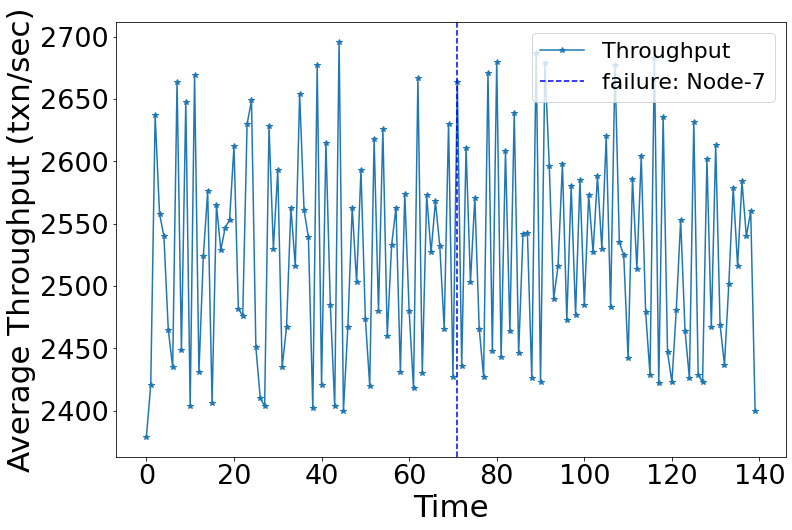

<Figure size 432x288 with 0 Axes>

In [97]:

from itertools import cycle
cycol = cycle('bgrcmk')


fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(s1,s2, '-*', label = 'Throughput')

pl.axvline(x = 71, color = next(cycol), linestyle='--', label = 'failure: Node-7')
# pl.axvline(x = 82, color = next(cycol), linestyle='--', label = 'failure: Node-8')
# pl.axvline(x = 93, color = next(cycol), linestyle='--', label = 'failure: Node-9')
# pl.axvline(x = 104, color = next(cycol), linestyle='--', label = 'failure: Node-17')
# pl.axvline(x = 115, color = next(cycol), linestyle='--', label = 'failure: Node-18')
# pl.axvline(x = 126, color = next(cycol), linestyle='--', label = 'failure: Node-19')

pl.legend()
pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# pl.ylim(0,50)
pl.savefig(experiment+'/thput.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

(0.0, 0.6)

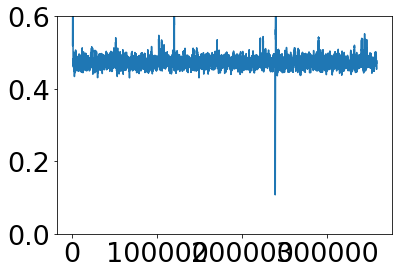

In [98]:
pl.plot(lats)
pl.ylim(0,0.6)

In [99]:
np.savetxt(experiment + '/throughput_data.txt',np.array([s1,s2]))

In [100]:
np.average(s2[-75:-15])

2532.9

In [101]:
# experiment = '../../../hotstuff_experiments/cross_region_exp95'

# a = np.loadtxt(experiment + '/throughput_data.txt')

In [102]:
# np.average(a[1][-75:-15])

ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-18-197-179-155.eu-central-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
hotstuff-client: no process found
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-234-38-34.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
2 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-110-212-95.ap-south-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec2.conf >../nohup.out 2>&1 &"
hotstuff-client: no process found
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-3-68-117-26.eu-central-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
hotstuff-client: no process found
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-110-172-134.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubun

ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-18-192-6-110.eu-central-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
24 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-18-184-175-1.eu-central-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec22.conf >../nohup.out 2>&1 &"
ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-3-68-106-77.eu-central-1.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx 2 --iter -1 --max-async 400 >../nohup.out 2>&1 &"
hotstuff-app: no process found
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-3-70-200-104.eu-central-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
28 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKE.pem ubuntu@ec2-3-69-54-217.eu-central-1.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec26.conf >../n